## Specific expectations for the proposal (DELETE BEFORE SUBMISSION):
Each group is expected to prepare a 1 page (max 500 words) written proposal that identifies the dataset they plan to work on, as well as the question they would like to answer using that dataset for their group project. The proposal should be done in a Jupyter notebook, and then submitted both as an .html file (File -> Download As -> HTML) and an .ipynb file that is reproducible (i.e. works and runs without any additional files.)

## **Introduction**

Heart disease refers to a general group of conditions that affect the heart. As heart disease is among the top reasons accounting for deaths in North America, diagnosis is one of the most crucial steps in the treatment process. Classifying the type of chest pain a patient exhibits is an effective way to explore the type of heart disease the patient has since different chest pain is associated with different types of heart disease. Chest pain is usually classified into 4 categories: typical angina, atypical angina, non-anginal pain, and asymptomatic. Along with other general observations of the patient, possible predictions on the type of chest pain can be made. The main question we are trying to answer is: How are resting blood pressure, age, and maximum heart rate achieved related to the type of chest pain a patient exhibits and how accurate is it to predict the type based on these three variables? The data we are working with for this project is a database containing different characteristic observations that link to heart conditions. The larger data set includes databases from Cleveland, Hungary, Switzerland, and the VA Long Beach. We have combined the data from each region and produced a single data frame to answer our question. 



## **Preliminary Exploratory Data Analysis**

- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
options(repr.plot.width = 8, repr.plot.height = 8)

sws_url <- "https://raw.github.com/aaelbaz/DSCI-100-Group-Project/215e081060c7280c1d975721f1934d3c147aa8fe/heart_disease_data/processed.switzerland.data"
clv_url <- "https://raw.github.com/aaelbaz/DSCI-100-Group-Project/215e081060c7280c1d975721f1934d3c147aa8fe/heart_disease_data/processed.cleveland.data"
hgr_url <- "https://raw.github.com/aaelbaz/DSCI-100-Group-Project/215e081060c7280c1d975721f1934d3c147aa8fe/heart_disease_data/processed.hungarian.data"
vlb_url <- "https://raw.github.com/aaelbaz/DSCI-100-Group-Project/215e081060c7280c1d975721f1934d3c147aa8fe/heart_disease_data/processed.va.data"

cols <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
na_vals <- c("", "NA", "?")

sws <- read_csv(sws_url, col_names = cols, na = na_vals) |> mutate(location = "Switzerland")
clv <- read_csv(clv_url, col_names = cols, na = na_vals) |> mutate(location = "Cleveland")
hgr <- read_csv(hgr_url, col_names = cols, na = na_vals) |> mutate(location = "Hungary")
vlb <- read_csv(vlb_url, col_names = cols, na = na_vals) |> mutate(location = "VA Long Beach")

heart_disease_data <- bind_rows(sws, clv, hgr, vlb)

head(heart_disease_data)

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column ty

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
32,1,1,95,0,NA,0,127,0,0.7,1,NA,NA,1,Switzerland
34,1,4,115,0,NA,NA,154,0,0.2,1,NA,NA,1,Switzerland
35,1,4,NA,0,NA,0,130,1,NA,NA,NA,7,3,Switzerland
36,1,4,110,0,NA,0,125,1,1.0,2,NA,6,1,Switzerland
38,0,4,105,0,NA,0,166,0,2.8,1,NA,NA,2,Switzerland
38,0,4,110,0,0,0,156,0,0.0,2,NA,3,1,Switzerland


In [3]:
cp_summarize <- heart_disease_data |>
group_by(cp) |>
summarize(avg_trestbps = mean(trestbps, na.rm = TRUE),
          avg_age = mean(age, na.rm = TRUE),
         avg_mhra = mean(thalach, na.rm = TRUE))
cp_summarize 

#ypical angina (1), atypical angina (2), non-anginal pain (3), and asymptomatic (4)

cp,avg_trestbps,avg_age,avg_mhra
<dbl>,<dbl>,<dbl>,<dbl>
1,136.0952,54.82609,149.5238
2,130.3353,49.24138,150.8563
3,130.6054,53.33333,144.6989
4,133.0236,54.95968,128.9149


Warning message:
“Removed 30 rows containing missing values (`geom_point()`).”


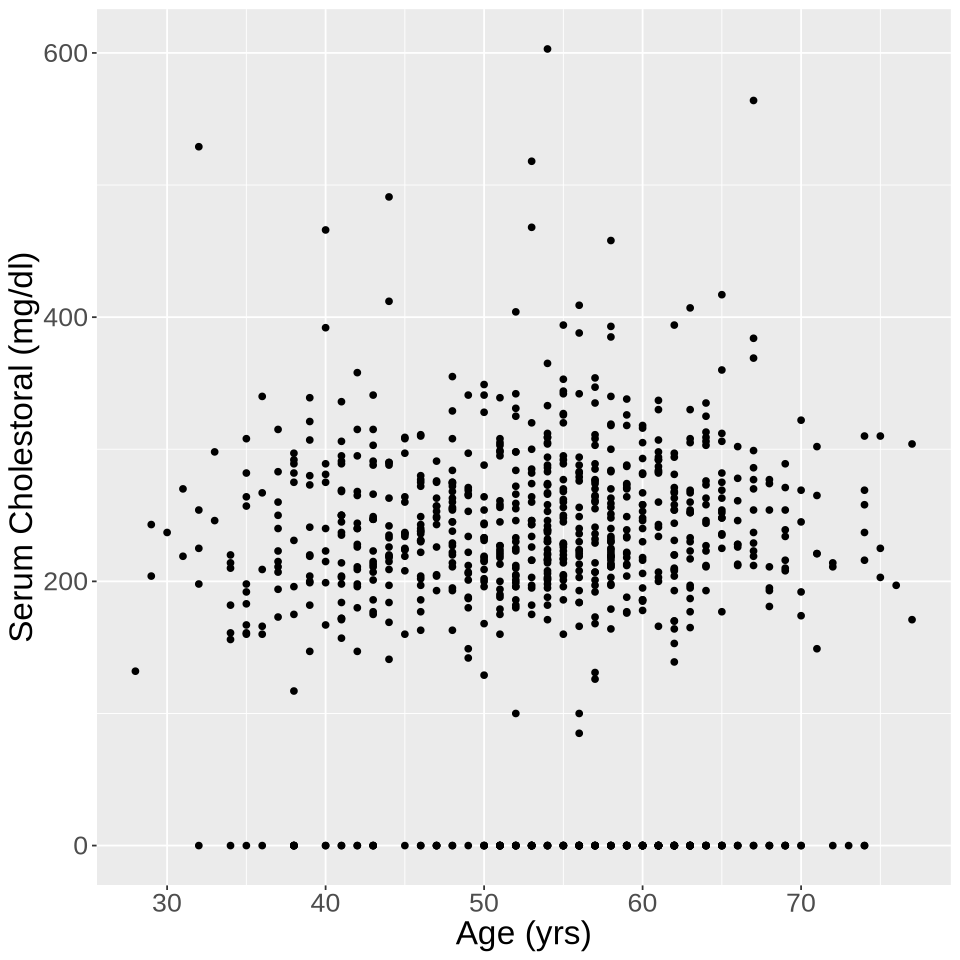

In [4]:
age_vs_chol_plot <- ggplot(heart_disease_data, aes(x = age, y = chol)) +
    geom_point() +
    labs(x = "Age (yrs)", y = "Serum Cholestoral (mg/dl)") +
    theme(text = element_text(size = 20))

age_vs_chol_plot

In [5]:
###

In [6]:
###

## **Methods**

#### Data Analysis Methods:
Our objective is to classify the type of chest pain that a person is having - typical anginal, atypical anginal, non-anginal, or asymptomatic - based on their resting blood pressure, age, and maximum heart rate achieved (chosen for their variable quantitative characteristics). Our classification will utilize the K-nearest neighbors model (classification mode) with tidymodels, which encompasses data preprocessing, model training, and class prediction. Given the absence of a distinct chest pain type of interest, the primary performance metric we will use to evaluate our classifier is accuracy rather than precision and recall. That being said, we still intend to produce a confusion matrix and calculate precision and recall for our analysis. To maximize classifier performance - namely by increasing accuracy - we will choose the optimal value for K by tuning our model. We will also incorporate cross validation on our training data to improve our accuracy estimate.

#### Visualizing Our Results:
We will visualize our results with two main graphs. The first will be a scatter plot of **\[INSERT PREDICTOR HERE]** vs. **\[INSERT PREDICTOR HERE]** with the observation of interest distinctly coloured and arrows connecting it to its K nearest neighbours, which will be coloured by class. This is to illustrate how K-nearest neighbours uses distance between points to classify a new observation. The second will be a bar graph showing the number of the observation of interest's neighbours that belong to each class. This is to illustrate how K-nearest neighbours decides class based on majority rule.

^^ Accuracy vs. K graph.

Also, can make two models, one using 2 predictors and one using say 4, and compare. Maybe 4 predictors predicts better, but is harder to visualize what's happening compared to 2 predictors (can't make a 4D graph...).

## **Expected Outcomes and Significance**

#### What We Expect to Find:
- What do you expect to find?

#### Potential Impacts Of Our Findings:
- What impact could such findings have?

#### Questions Which Could Arise From Our Findings:
- What future questions could this lead to?